## What is a decision tree?

Decision trees can be used for regression (continuous real-valued output, e.g. predicting the price of a house) or classification (categorical output, e.g. predicting email spam vs. no spam), but here we will focus on classification.

A decision tree classifier is a binary tree where predictions are made by traversing the tree from root to leaf — at each node, we go left if a feature is less than a threshold, right otherwise. Finally, each leaf is associated with a class, which is the output of the predictor.

### Their types:

There is a wide variety of decision trees, such as:
- ID3 (Iterative Dichotomiser 3)
- CART (Classification and Regression Tree)
- CHAID (Chi-squared Automatic Interaction Detector), etc.

#### How does it work?

- Starts at the root node
- Splits data into groups (based on some criteria)
- Set a decision at node
- Move the data along the respective branches
- Repeat the process until a stopping criterion is met (max levels/depth reached, min samples left to split, nothing left to split, etc)

#### How to choose root node:

This is slightly different in regression and classification trees.

**In regression trees**, we chose a splitting point such that there is the greatest reduction in RSS (Residual Sum of Squares).


<p>
        <img src = assets/1.png/ height = "400px" width = "400px">
</p>

Or we can calculate standard deviation reduction of the feature with respect to the training data. Here YR1 and YR2 are mean responses of region 1 and 2. Once we train the tree, we predict the response for a test data using the mean of the training observations in that group.

**In Classification trees:**

We use Entropy and Information Gain (in ID3). Gini Index for classification in the CART.

**Entropy (Shannon’s Entropy)** quantifies the uncertainty of chaos in the group. Higher entropy means higher the disorder. It is denoted by H(x), where x is a vector with probabilities p1, p2, p3…..

<p>
        <img src = assets/2.png/ height = "200px" width = "200px">
</p>

From the above figure, we can see that the entropy (uncertainty) is highest (1) when the probability is 0.5, i.e. 50–50 chances. And entropy is lowest when the probability is 0 or 1, i.e. there is no uncertainty or high chance of occurrence.


So, entropy is maximum if in a class there are an equal number of objects from different attributes (like the group has 50 cats and 50 dogs), and this is minimum if the node is pure (like the group has only 100 cats or only 100 dogs). We ultimately want to have minimum entropy for the tree, i.e. pure or uniform classes at the leaf nodes.

##### Entropy calculation:

<p>
        <img src = assets/3.png/ height = "400px" width = "400px">
</p>

- S — Current group for which we are interested in calculating entropy.
- Pi — Probability of finding that system in ith state, or this turns to the proportion of a number of elements in that split group to the number of elements in the group before splitting(parent group).

In this classification tree, while splitting the tree we select those attributes that achieves the greatest reduction in entropy. Now, this reduction (or change) in entropy is measured by **Information Gain** which is given by:

<p>
        <img src = assets/4.png/ height = "400px" width = "400px">
</p>

### Example:

The problem is about predicting whether some kid is going to eat a particular type of food given that kids prior eating habits.

<p>
        <img src = assets/5.png/ height = "400px" width = "400px">
</p>

From the above chart, we can see that the food preferences Taste, Temperature and Texture are exploratory variables and Eat (Yes/No) is target variable.

Now, we need to construct a top-down decision tree that splits the dataset and finally form a pure group, so we can predict for a new test variable if the kid eats or not.

We are going to use the ID3 algorithm for this.

<p>
        <img src = assets/6.png/ >
</p>

<p>
        <img src = assets/7.png/>
</p>

<p>
        <img src = assets/8.png/ >
</p>

<p>
        <img src = assets/8_1.png/ >
</p>

<p>
        <img src = assets/9.png/ >
</p>

<p>
        <img src = assets/10.png/ >
</p>

<p>
        <img src = assets/10_1.png/ >
</p>


<p>
        <img src = assets/11.png/ >
</p>

<p>
        <img src = assets/12.png/ >
</p>

<p>
        <img src = assets/12_1.png/ >
</p>

<p>
        <img src = assets/13.png/ >
</p>

<p>
        <img src = assets/final.png/>
</p>


#### Conclusion:

Finally, what we can conclude is, if the food is sweet the kid is not caring about its Temperature or Texture, he is eating.

If the food is Salty he is eating only if the texture is hard. And if the food is Spicy he eats if it is Hot and Hard or Cold and Soft. Bizarre Kid.

#### REFERENCES:

- [Math behing DT](https://medium.com/@rakendd/building-decision-trees-and-its-math-711862eea1c0)

## Code sample 1:

In [3]:
import numpy as np
import pandas as pd

eps = np.finfo(float).eps # ‘eps’ here is the smallest representable number. 
# At times we get log(0) or 0 in the denominator, to avoid that we are going to use this.

from numpy import log2 as log

In [4]:
# Since the dataset we saw above was small, we represent it with a dictionary

dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
       'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
       'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
       'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}


In [5]:
df = pd.DataFrame(dataset, columns = ['Taste', 'Temperature', 'Texture', 'Eat'])

In [6]:
df

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No
2,Spicy,Hot,Hard,Yes
3,Spicy,Cold,Hard,No
4,Spicy,Hot,Hard,Yes
5,Sweet,Cold,Soft,Yes
6,Salty,Cold,Soft,No
7,Sweet,Hot,Soft,Yes
8,Spicy,Cold,Soft,Yes
9,Salty,Hot,Hard,Yes


We first need to find entropy and then information gain for splitting the dataset

<p>
        <img src = assets/3.png/ height = "400px" width = "400px">
</p>

We’ll define a function that takes in class (target variable vector) and finds the entropy of that class.
Here the fraction is ‘pi’, it is the proportion of a number of elements in that split group to the number of elements in the group before splitting(parent group).

In [7]:
entropy_node = 0 #initialize entropy
values = df.Eat.unique() #Unique objects - 'Yes' or 'No'
# values
for value in values:
    frac = df.Eat.value_counts()[value]/len(df.Eat)
    entropy_node += -frac*np.log2(frac) #summation
    
# df.Eat.value_counts()

In [8]:
entropy_node

0.9709505944546686

This is same as the entropy (Eo) we calculated above.

Now calculating the entropy of the other attributes

In [9]:
attribute = 'Taste'
target_variables = df.Eat.unique() #This gives all 'Yes' and 'No'
variables = df[attribute].unique() #This gives different features in that attribute (like 'Sweet')  

In [10]:
df[attribute]

0    Salty
1    Spicy
2    Spicy
3    Spicy
4    Spicy
5    Sweet
6    Salty
7    Sweet
8    Spicy
9    Salty
Name: Taste, dtype: object

In [11]:
entropy_attribute = 0
for variable in variables:
    entropy_each_feature = 0
    for target_variable in target_variables:
        num = len(df[attribute][df[attribute] == variable][df.Eat == target_variable])
        den = len(df[attribute][df[attribute] == variable])
        
        frac = num/(den+eps) #pi
        entropy_each_feature += -frac*log(frac+eps) #This calculates entropy for one feature like 'Sweet'
        
    frac2 = den/len(df)    
    entropy_attribute += -frac2*entropy_each_feature #Sums up all the entropy ETaste

In [12]:
entropy_attribute = 0
for variable in variables:
    print(f"variable: {variable}")
    entropy_each_feature = 0
    for target_variable in target_variables:
        print(f"target_variable: {target_variable}")
        print(f"n: {df[attribute][df[attribute] == variable]}")
        num = len(df[attribute][df[attribute] == variable][df.Eat == target_variable])
        den = len(df[attribute][df[attribute] == variable])
        print(f"num: {num} and den: {den}")
        frac = num/(den+eps) #pi
        entropy_each_feature += -frac*log(frac+eps) #This calculates entropy for one feature like 'Sweet'
        print(f"entropy_each_feature: {entropy_each_feature}")
    
    frac2 = den/len(df)    
    print(f"frac2: {frac2}")
    entropy_attribute += -frac2*entropy_each_feature #Sums up all the entropy ETaste
    print(f"entropy_attr: {entropy_attribute}")

variable: Salty
target_variable: No
n: 0    Salty
6    Salty
9    Salty
Name: Taste, dtype: object
num: 2 and den: 3
entropy_each_feature: 0.3899750004807705
target_variable: Yes
n: 0    Salty
6    Salty
9    Salty
Name: Taste, dtype: object
num: 1 and den: 3
entropy_each_feature: 0.9182958340544889
frac2: 0.3
entropy_attr: -0.27548875021634667
variable: Spicy
target_variable: No
n: 1    Spicy
2    Spicy
3    Spicy
4    Spicy
8    Spicy
Name: Taste, dtype: object
num: 2 and den: 5
entropy_each_feature: 0.5287712379549446
target_variable: Yes
n: 1    Spicy
2    Spicy
3    Spicy
4    Spicy
8    Spicy
Name: Taste, dtype: object
num: 3 and den: 5
entropy_each_feature: 0.970950594454668
frac2: 0.5
entropy_attr: -0.7609640474436807
variable: Sweet
target_variable: No
n: 5    Sweet
7    Sweet
Name: Taste, dtype: object
num: 0 and den: 2
entropy_each_feature: 0.0
target_variable: Yes
n: 5    Sweet
7    Sweet
Name: Taste, dtype: object
num: 2 and den: 2
entropy_each_feature: -3.2034265038149176

In [13]:
# Entropy for Taste:
abs(entropy_attribute)

0.7609640474436806

In [14]:
# The information gain is simply: entropy_node - entropy_attribute
IG_taste = entropy_node - abs(entropy_attribute)
IG_taste

0.20998654701098796

In [15]:
# We now calculate the entropy for other attributes like temp and texture

attribute = 'Temperature'
target_variables = df.Eat.unique() #This gives all 'Yes' and 'No'
variables = df[attribute].unique() #This gives different features in that attribute (like 'Sweet')  

In [16]:
df[attribute]

0     Hot
1     Hot
2     Hot
3    Cold
4     Hot
5    Cold
6    Cold
7     Hot
8    Cold
9     Hot
Name: Temperature, dtype: object

In [17]:
entropy_attribute = 0
for variable in variables:
    entropy_each_feature = 0
    for target_variable in target_variables:
        num = len(df[attribute][df[attribute] == variable][df.Eat == target_variable])
        den = len(df[attribute][df[attribute] == variable])
        
        frac = num/(den+eps) #pi
        entropy_each_feature += -frac*log(frac+eps) #This calculates entropy for one feature like 'Sweet'
        
    frac2 = den/len(df)    
    entropy_attribute += -frac2*entropy_each_feature #Sums up all the entropy ETaste

In [18]:
# Entropy for Temperature:
abs(entropy_attribute)

0.950977500432693

In [19]:
# The information gain is simply: entropy_node - entropy_attribute
IG_temp = entropy_node - abs(entropy_attribute)
IG_temp

0.019973094021975557

In [20]:
attribute = 'Texture'
target_variables = df.Eat.unique() #This gives all 'Yes' and 'No'
variables = df[attribute].unique() #This gives different features in that attribute (like 'Sweet')  

In [21]:
df[attribute]

0    Soft
1    Soft
2    Hard
3    Hard
4    Hard
5    Soft
6    Soft
7    Soft
8    Soft
9    Hard
Name: Texture, dtype: object

In [22]:
entropy_attribute = 0
for variable in variables:
    print(f"variable: {variable}")
    entropy_each_feature = 0
    for target_variable in target_variables:
        print(f"target_variable: {target_variable}")
        print(f"n: {df[attribute][df[attribute] == variable]}")
        num = len(df[attribute][df[attribute] == variable][df.Eat == target_variable])
        den = len(df[attribute][df[attribute] == variable])
        print(f"num: {num} and den: {den}")
        frac = num/(den+eps) #pi
        entropy_each_feature += -frac*log(frac+eps) #This calculates entropy for one feature like 'Sweet'
        print(f"entropy_each_feature: {entropy_each_feature}")
    
    frac2 = den/len(df)    
    print(f"frac2: {frac2}")
    entropy_attribute += -frac2*entropy_each_feature #Sums up all the entropy ETaste
    print(f"entropy_attr: {entropy_attribute}")

variable: Soft
target_variable: No
n: 0    Soft
1    Soft
5    Soft
6    Soft
7    Soft
8    Soft
Name: Texture, dtype: object
num: 3 and den: 6
entropy_each_feature: 0.49999999999999967
target_variable: Yes
n: 0    Soft
1    Soft
5    Soft
6    Soft
7    Soft
8    Soft
Name: Texture, dtype: object
num: 3 and den: 6
entropy_each_feature: 0.9999999999999993
frac2: 0.6
entropy_attr: -0.5999999999999995
variable: Hard
target_variable: No
n: 2    Hard
3    Hard
4    Hard
9    Hard
Name: Texture, dtype: object
num: 1 and den: 4
entropy_each_feature: 0.49999999999999967
target_variable: Yes
n: 2    Hard
3    Hard
4    Hard
9    Hard
Name: Texture, dtype: object
num: 3 and den: 4
entropy_each_feature: 0.8112781244591322
frac2: 0.4
entropy_attr: -0.9245112497836524


In [23]:
# Entropy for Texture:
abs(entropy_attribute)

0.9245112497836524

In [24]:
# The information gain is simply: entropy_node - entropy_attribute
IG_texture = entropy_node - abs(entropy_attribute)
IG_texture

0.04643934467101618

In [83]:
# We’ll find the winner node, the one with the highest Information Gain. We repeat this process to find 
# which is the attribute we need to consider to split the data at the nodes.


def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

def find_entropy_attribute(df, attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique() # Gives all 'Yes' and 'No'
    variables = df[attribute].unique() # #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for target_variable in target_variables:
        entropy = 0
        for variable in variables:
            num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
            den = len(df[attribute][df[attribute] == variable])
            
            frac = num/(den+eps)
            entropy += -frac*log(frac+eps)
            
        frac2 = den/len(df)
        entropy2 += -frac2*entropy
    return abs(entropy2)

def find_winner(df):
    entropy_att = []
    IG = []
    
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df) - find_entropy_attribute(df, key)) 
    return df.keys()[:-1][np.argmax(IG)]

def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree = {}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['Eat'],return_counts=True)
    
        if len(counts)==1: #Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively                
    return tree

In [84]:
tree = buildTree(df)

In [85]:
import pprint
pprint.pprint(tree)

{'Taste': {'Salty': {'Texture': {'Hard': 'Yes', 'Soft': 'No'}},
           'Spicy': {'Temperature': {'Cold': {'Texture': {'Hard': 'No',
                                                          'Soft': 'Yes'}},
                                     'Hot': {'Texture': {'Hard': 'Yes',
                                                         'Soft': 'No'}}}},
           'Sweet': 'Yes'}}


In [97]:
# Make predictions

def predict(inst, tree):
    
    for nodes in tree.keys():
        value = inst[nodes]
        tree = tree[nodes][value]
        
        prediction = 0
        
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
    return prediction

In [98]:
inst = df.iloc[6] # takes row with index 6
inst

Taste          Salty
Temperature     Cold
Texture         Soft
Eat               No
Name: 6, dtype: object

In [96]:
prediction = predict(inst, tree)
prediction

'No'

In [99]:
# Prediction on new data

data = {'Taste': 'Salty', 'Temperature':'Cold', 'Texture':'Hard'}
inst = pd.Series(data)

In [101]:
prediction = predict(inst, tree)
prediction

'Yes'

## Code sample 2:

In [102]:
import pandas as pd

### Dataset

We'll be considering the [Wireless Indoor Localization Dataset](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) It gives 7 features representing the strength of 7 Wi-Fi signals perceived by a phone in an apartment, along with the indoor location of the phone which can be Room 1, 2, 3 or 4.

The goal is to predict which room the phone is located in based on the strength of Wi-Fi signals 1 to 7. 

#### Gini impurity

Decision trees use the concept of Gini impurity to describe how homogeneous or “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.

<p>
        <img src = assets/14.png/>
</p>

<p>
        <img src = assets/15.png/>
</p>

#### Finding the optimal feature and threshold

The key to the CART algorithm is finding the optimal feature and threshold such that the Gini impurity is minimized. To do so, we try all possible splits and compute the resulting Gini impurities.

But how can we try all possible thresholds for a continuous values? There is a simple trick — sort the values for a given feature, and consider all midpoints between two adjacent values. Sorting is costly, but it is needed anyway as we will see shortly.

Now, how might we compute the Gini of all possible splits?

The first solution is to actually perform each split and compute the resulting Gini. Unfortunately this is slow, since we would need to look at all the samples to partition them into left and right. More precisely, it would be n splits with O(n) operations for each split, making the overall operation O(n²).

A faster approach is to
- iterate through the sorted feature values as possible thresholds 
- keep track of the number of samples per class on the left and on the right
- increment/decrement them by 1 after each threshold. From them we can easily compute Gini in constant time.

<p>
        <img src = assets/16.png/>
</p>

<p>
        <img src = assets/17.png/>
</p>

In [1]:
import numpy as np

In [2]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [14]:
class DecisionTreeClassifier:
    def __init__(self, max_depth = None):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        """
        Build Decision Tree Classifier
        """
        self.n_classes_ = len(set(y)) # classes are assumed to go from 0 to n-1
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)
    
#     def _gini(self, y):
#         """Compute Gini impurity of a non-empty node.
#         Gini impurity is defined as Σ p(1-p) over all classes, with p the frequency of a
#         class within the node. Since Σ p = 1, this is equivalent to 1 - Σ p^2.
#         """
#         m = y.size
#         return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))
    
    def best_split(self, X, y):
        """
        Find the best split for a node.
        "Best" means that the average impurity of the two children, weighted by their
        population, is the smallest possible. Additionally it must be less than the
        impurity of the current node.
        To find the best split, we loop through all the features, and consider all the
        midpoints between adjacent training samples as possible thresholds. We compute
        the Gini impurity of the split generated by that particular feature/threshold
        pair, and return the pair with smallest impurity.
        Returns:
            best_idx: Index of the feature for best split, or None if no split is found.
            best_thr: Threshold to use for the split, or None if no split is found.
        """
        # Need atleast two elements to split a node
        m = y.size
        
        if m<2:
            return None, None
        
        # Count of each class in current node
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        
        # Gini of current node
        best_gini = 1.0 - sum((n/m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        
        # Loop through all features
        for idx in range(self.n_features_):
            # Sort data along selected feature
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            
            # We could actually split the node according to each feature/threshold pair
            # and count the resulting population for each class in the children, but
            # instead we compute them in an iterative fashion, making this for loop
            # linear rather than quadratic.
            
            num_left = [0]*(self.n_classes_)
            num_right = num_parent.copy()
            
            for i in range(1, m): #possible split positions
                c = classes[i-1]
                num_left[c] += 1
                num_right[c] -= 1
                
                gini_left = 1.0 - sum((num_left[x]/i)**2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x]/(m-i))**2 for x in range(self.n_classes_))
                
                # The Gini impurity of a split is the weighted average of the Gini
                # impurity of the children.
                gini = (i * gini_left + (m-i) * gini_right)/m
                
                # The following condition is to make sure we don't try to split two
                # points with identical values for that feature, as it is impossible
                # (both have to end up on the same side of a split).
                if thresholds[i] == thresholds[i-1]:
                    continue
                
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i-1])/2 # midpoint
            return best_idx, best_thr
    
    def _grow_tree(self, X, y, depth = 0):
        """
        Build DT by recursively finding the best split
        """
        # Population for each class in current node. The predicted class is the one with
        # largest population.
        
        num_samples_per_class = np.sum((y==i) for i in range(self.n_classes_))
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class = predicted_class)
        
        # Split recursively until max_depth is reached
        if depth < self.max_depth:
            idx, thr = self.best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
    
    # Making predictions
    # Go left if the feature value is below the threshold, go right otherwise.
    def predict(self, X):
        return [self._predict(inputs) for inputs in X]
    
    def _predict(self, inputs):
        """
        Predict class for a single sample
        """
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
            return node.predicted_class

In [17]:
import pandas as pd
from sklearn.utils import Bunch

df = pd.read_csv("wifi_localization.txt", delimiter="\t")
data = df.to_numpy()

dataset = Bunch(
            data=data[:, :-1],
            target=data[:, -1] - 1,
            feature_names=["Wifi {}".format(i) for i in range(1, 8)],
            target_names=["Room {}".format(i) for i in range(1, 5)],
        )

X, y = dataset.data, dataset.target
    
# Fit data.
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

input = [-70, 0, 0, 0, -40, 0, 0]

pred = clf.predict([input])[0]
print("Input: {}".format(input))
print("Prediction: " + dataset.target_names[pred])

Input: [-70, 0, 0, 0, -40, 0, 0]
Prediction: Room 1


/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:92: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


In [16]:
import sys
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data, dataset.target  # pylint: disable=no-member

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)
print(clf.predict([[0, 0, 5, 1.5]]))

[0]


/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:92: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


<p>
        <img src = assets/18.png/>
</p>

### Complexity

It’s easy to see that prediction is in O(log m), where m is the depth of the tree.
But how about training? The Master Theorem will be helpful here. The time complexity of fitting a tree on a dataset with n samples can be expressed with the following recurrence relation:

<p>
        <img src = assets/19.png/>
</p>

where, assuming the best case where left and right children have the same size, a = 2 and b = 2; and f(n) is the complexity of splitting the node in two children, in other words the complexity of _best_split. The first for loop iterates on the features, and for each iteration there is a sort of complexity O(n log n) and another for loop in O(n). Therefore f(n) is O(k n log n) where k is the number of features.

With those assumptions, the Master Theorem tells us that the total time complexity is

<p>
        <img src = assets/20.png/>
</p>

This is not too far from but still worse than the complexity of the Scikit-Learn implementation, apparently in O(k n log n). 

### REFERENCES:
- [DT from scratch python](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775)

### Code sample 3: Decision Tree Regression using sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
X = dataset.iloc[:, 1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
y = dataset.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [12]:
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [16]:
y_pred = regressor.predict(np.array(6.5).reshape(1, -1))
y_pred

array([150000.])

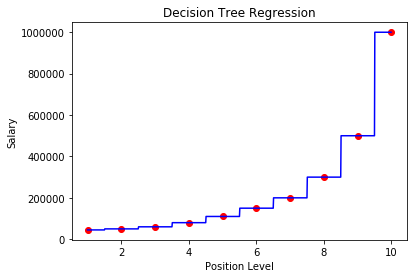

In [22]:
# Visualizing the results for higher resolution and smoother curve

X_grid = np.arange(min(X), max(X), 0.01) # 0.01 describes the resolution
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Decision Tree Regression")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

As we can see here, for 6.5 position level, our predicted salary will be around 150k